# Student Success Analytical Report and Research Proposal


## Data Set Description

__Source:__ [https://www.kaggle.com/uciml/student-alcohol-consumption]

__Context:__ In this project, I will be studying survey data that provides information about a student's life outside of school in order to determine relationships that might predict a student's drinking habits or grades.  This data is from students in a math or portuguese language course in secondary schools in Portugal. While the data is broken up into two separate datasets for the two courses, I will focus on the math class, the attributes of which focus on student background, parent background, student school data, student social data, and student grades.  I will focus my discussion on trends for the math class by topic.  

__Abbreviations and Scales:__
- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, pearsonr
%matplotlib inline

In [2]:
# Reading in file and inspecting
math_df = pd.read_csv('student-mat.csv')
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Analytic Report

### Description of Numerical Variables:
Most of the data was categorized by a scale of 1-5.  I wanted to better understand the distribution and central tendencies of the data.  First, I noticed that all data counts were 395 for the math data, meaning that there were no null values that needed to be cleaned.  Most means were between 2 and 3 with standard deviations around 1.  I noted that the second grading period (G2) and final grades (G3) both had minimum values of 0.00, whereas the first grading period (G1) did not.  As I am unsure if this is a flaw in the data, the student actually earned a 0.00, or this was a null value replaced with 0.00, for most analyses, I will be using G1 to correlate grade data.

In [3]:
math_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Student Background Data:
This part of the data set includes information about the student, including which school they attend, their sex, age, as well as information about their families, such as whether they live in an urban or rural area, and their family size. 

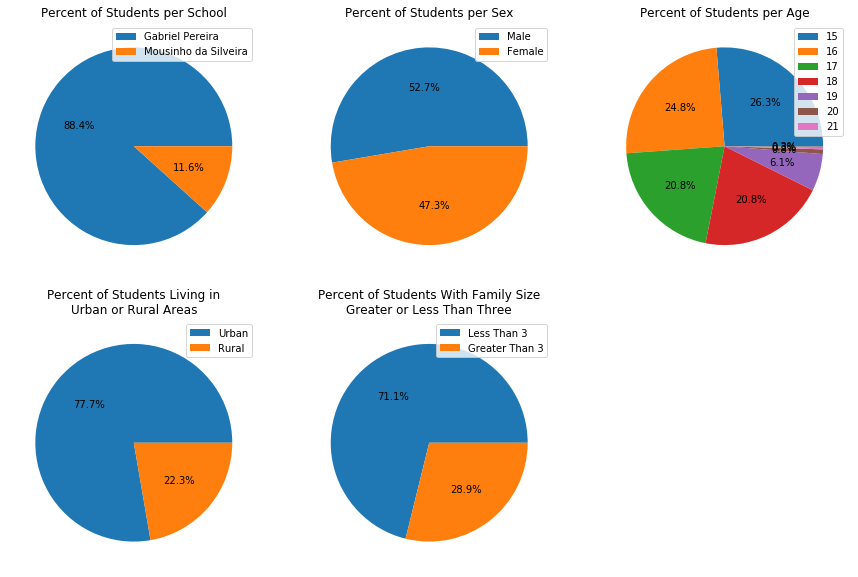

In [4]:
plt.figure(figsize=(15, 10))
#plotting each value
plt.subplot(2, 3, 1)
plt.pie(math_df.school.value_counts(), autopct='%1.1f%%')
plt.legend(['Gabriel Pereira', 'Mousinho da Silveira'], loc='best')
plt.title('Percent of Students per School')

plt.subplot(2, 3, 2)
plt.pie(math_df.sex.value_counts(), autopct='%1.1f%%')
plt.legend(['Male', 'Female'], loc='best')
plt.title('Percent of Students per Sex')

plt.subplot(2, 3, 3)
plt.pie(math_df.age.value_counts(), autopct='%1.1f%%')
plt.legend(np.arange(15,22), loc='best')
plt.title('Percent of Students per Age')

plt.subplot(2, 3, 4)
plt.pie(math_df.address.value_counts(), autopct='%1.1f%%')
plt.legend(['Urban', 'Rural'])
plt.title('Percent of Students Living in\nUrban or Rural Areas')

plt.subplot(2, 3, 5)
plt.pie(math_df.famsize.value_counts(), autopct='%1.1f%%')
plt.legend(['Less Than 3', 'Greater Than 3'])
plt.title('Percent of Students With Family Size\nGreater or Less Than Three')

plt.show()

The data is generally fairly unbiased with a slight bias towards the Gabriel Pereira School, urban areas, and families with less than three children.  All of these are porportional to the population of Portugal, as most people live in urban areas and have less than three children.  


### Parent Background Data:
This section of data contains detailed information about the student's parents including cohabitation status, highest level of education, career, and reason for choosing the school. 

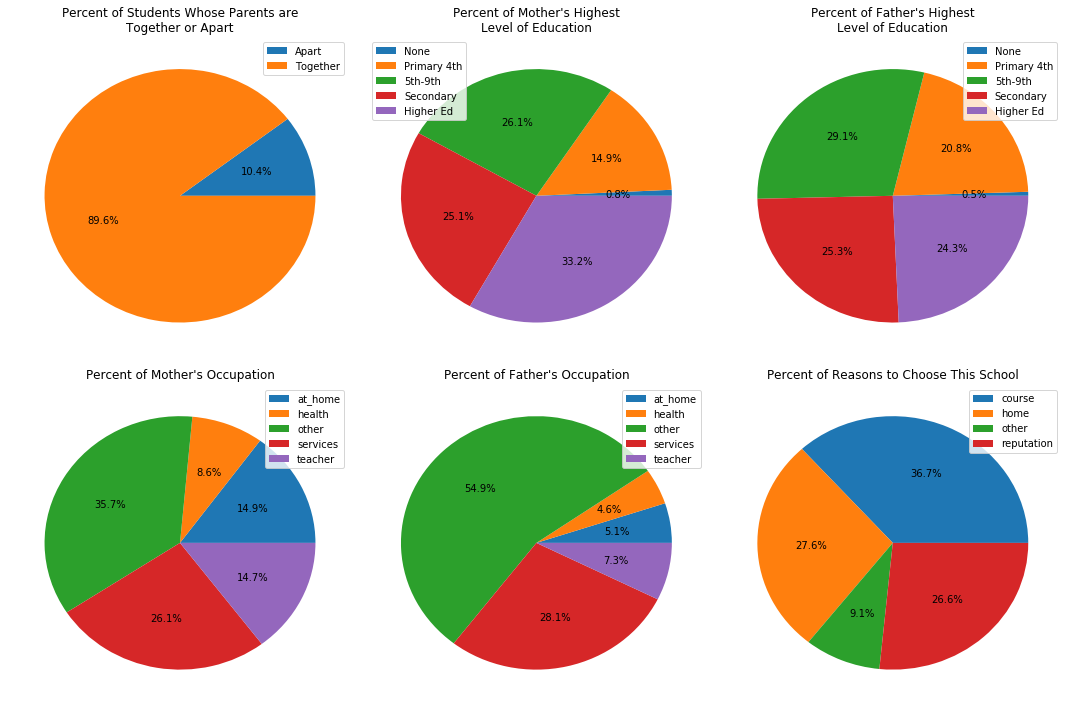

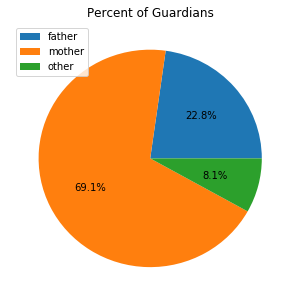

In [5]:
plt.figure(figsize=(15, 10))
#plotting each value
plt.subplot(2, 3, 1)
#processing data to create value counts, sorted by index for consistency
pstatus = math_df.Pstatus.value_counts().sort_index()
plt.pie(pstatus, autopct='%1.1f%%')
plt.legend(['Apart', 'Together'], loc='best')
plt.title('Percent of Students Whose Parents are\nTogether or Apart')

plt.subplot(2, 3, 2)
#processing data to create value counts, sorted by index for consistency
medu = math_df.Medu.value_counts().sort_index()
plt.pie(medu, autopct='%1.1f%%')
plt.legend(['None', 'Primary 4th', '5th-9th', 'Secondary', 'Higher Ed'], loc='best')
plt.title("Percent of Mother's Highest\nLevel of Education")

plt.subplot(2, 3, 3)
#processing data to create value counts, sorted by index for consistency
fedu = math_df.Fedu.value_counts().sort_index()
plt.pie(fedu, autopct='%1.1f%%')
plt.legend(['None', 'Primary 4th', '5th-9th', 'Secondary', 'Higher Ed'], loc='best')
plt.title("Percent of Father's Highest\nLevel of Education")

plt.subplot(2, 3, 4)
#processing data to create value counts, sorted by index for consistency
mjob = math_df.Mjob.value_counts().sort_index()
plt.pie(mjob, autopct='%1.1f%%')
plt.legend(mjob.index, loc='best')
plt.title("Percent of Mother's Occupation")

plt.subplot(2, 3, 5)
#processing data to create value counts, sorted by index for consistency
fjob = math_df.Fjob.value_counts().sort_index()
plt.pie(fjob, autopct='%1.1f%%')
plt.legend(fjob.index, loc='best')
plt.title("Percent of Father's Occupation")

plt.subplot(2, 3, 6)
#processing data to create value counts, sorted by index for consistency
reason = math_df.reason.value_counts().sort_index()
plt.pie(reason, autopct='%1.1f%%')
plt.legend(reason.index, loc='best')
plt.title("Percent of Reasons to Choose This School")

plt.tight_layout()
plt.show()

#processing data to create value counts, sorted by index for consistency
guardian = math_df.guardian.value_counts().sort_index()
plt.figure(figsize=(5, 5))
plt.pie(guardian, autopct='%1.1f%%')
plt.legend(guardian.index, loc='best')
plt.title("Percent of Guardians")
plt.show()

From this data, we can deduce that 89.6% of student's parents are together.  Additionally, the mothers are more highly educated than the fathers with the highest percent of mothers attending higher education (4), whereas the highest percent of fathers only completed between 5th and 9th grade of primary school (2).  For their careers, more of the mothers worked in some public service related industry, such as teaching, health care, civil services, or at home, whereas the majority of fathers worked in a non-service industry.  The data does not go into depth about what these "other" fields are.  Finally, the majority of parents chose this school based on the course and the school's reputation for success, and an overwhelming majority of mothers act as student's guardians. 

### Student School Data:
The data then delves into more context for the student at school, namely their travel time to school, time spent studying, number of previous failures, school support, family educational or finanial support for classes, if they participated in extracurricular activities, whether they attended nursery school or not, and if they want to seek higher education.


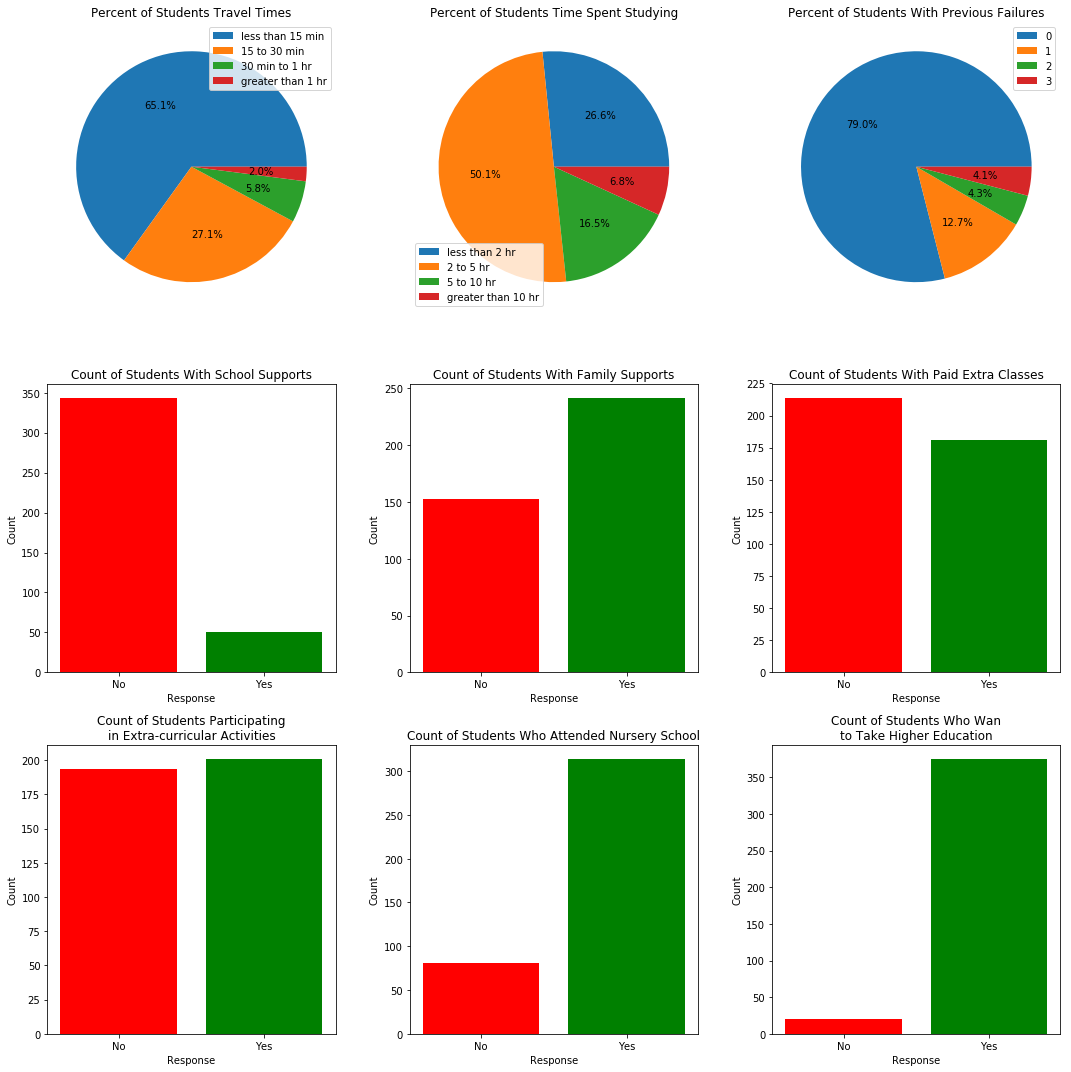

In [6]:
plt.figure(figsize=(15, 15))
#plotting each value
plt.subplot(3, 3, 1)
#processing data to create value counts, sorted by index for consistency
traveltime = math_df.traveltime.value_counts().sort_index()
plt.pie(traveltime, autopct='%1.1f%%')
plt.legend(['less than 15 min', '15 to 30 min', '30 min to 1 hr', 'greater than 1 hr'], loc='best')
plt.title('Percent of Students Travel Times')

plt.subplot(3, 3, 2)
#processing data to create value counts, sorted by index for consistency
studytime = math_df.studytime.value_counts().sort_index()
plt.pie(studytime, autopct='%1.1f%%')
plt.legend(['less than 2 hr', '2 to 5 hr', '5 to 10 hr', 'greater than 10 hr'], loc='best')
plt.title('Percent of Students Time Spent Studying')

plt.subplot(3, 3, 3)
#processing data to create value counts, sorted by index for consistency
failures = math_df.failures.value_counts().sort_index()
plt.pie(failures, autopct='%1.1f%%')
plt.legend(failures.index, loc='best')
plt.title('Percent of Students With Previous Failures')

plt.subplot(3, 3, 4)
#processing data to create value counts, sorted by index for consistency
schoolsup = math_df.schoolsup.value_counts().sort_index()
x=['No', 'Yes']
plt.bar(x, height=schoolsup, color=['red', 'green'])
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Count of Students With School Supports')

plt.subplot(3, 3, 5)
#processing data to create value counts, sorted by index for consistency
famsup = math_df.famsup.value_counts().sort_index()
plt.bar(x, height=famsup, color=['red', 'green'])
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Count of Students With Family Supports')

plt.subplot(3, 3, 6)
#processing data to create value counts, sorted by index for consistency
paid = math_df.paid.value_counts().sort_index()
plt.bar(x, height=paid, color=['red', 'green'])
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Count of Students With Paid Extra Classes')

plt.subplot(3, 3, 7)
#processing data to create value counts, sorted by index for consistency
activities = math_df.activities.value_counts().sort_index()
plt.bar(x, height=activities, color=['red', 'green'])
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Count of Students Participating\nin Extra-curricular Activities')

plt.subplot(3, 3, 8)
#processing data to create value counts, sorted by index for consistency
nursery = math_df.nursery.value_counts().sort_index()
plt.bar(x, height=nursery, color=['red', 'green'])
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Count of Students Who Attended Nursery School')

plt.subplot(3, 3, 9)
#processing data to create value counts, sorted by index for consistency
higher = math_df.higher.value_counts().sort_index()
plt.bar(x, height=higher, color=['red', 'green'])
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Count of Students Who Wan\nto Take Higher Education')

plt.tight_layout()
plt.show()

This data depicts that most students only take less than 15 minutes to get to school, and spend less than 5 hours studying a week.  The data also reveals that a majority of students have not failed previous courses. This is likely because although students are generally not receiving extra educational support at school, they experience support from their family.  Less than half of students receive additional support in the form of paid courses, about half of students participate in extracurricular activities, a majority of students attended nursery school, and students overwhelmingly want to take higher education.


### Student Social Data:
Then, information is given as to the student's life outside of school, including internet access, having romantic relationships, quality family relationships, amount of free time after school, how often they go out with friends, how much the consume alcohol both on workdays and weekends, their current health status, and the number of absences they have from school.

Based on this data, we know that most students have internet at home, and are not in romantic relationships.  Most students have high quality family relationships and are healthy.  Most students have moderate amounts of free time and moderate time spent going out with friends.  A majority of students consume very little alcohol on week days, but those rankings increase for alcohol consumption on weekends.  Finally, the majority of students have been absent from school fewer than 10 days.


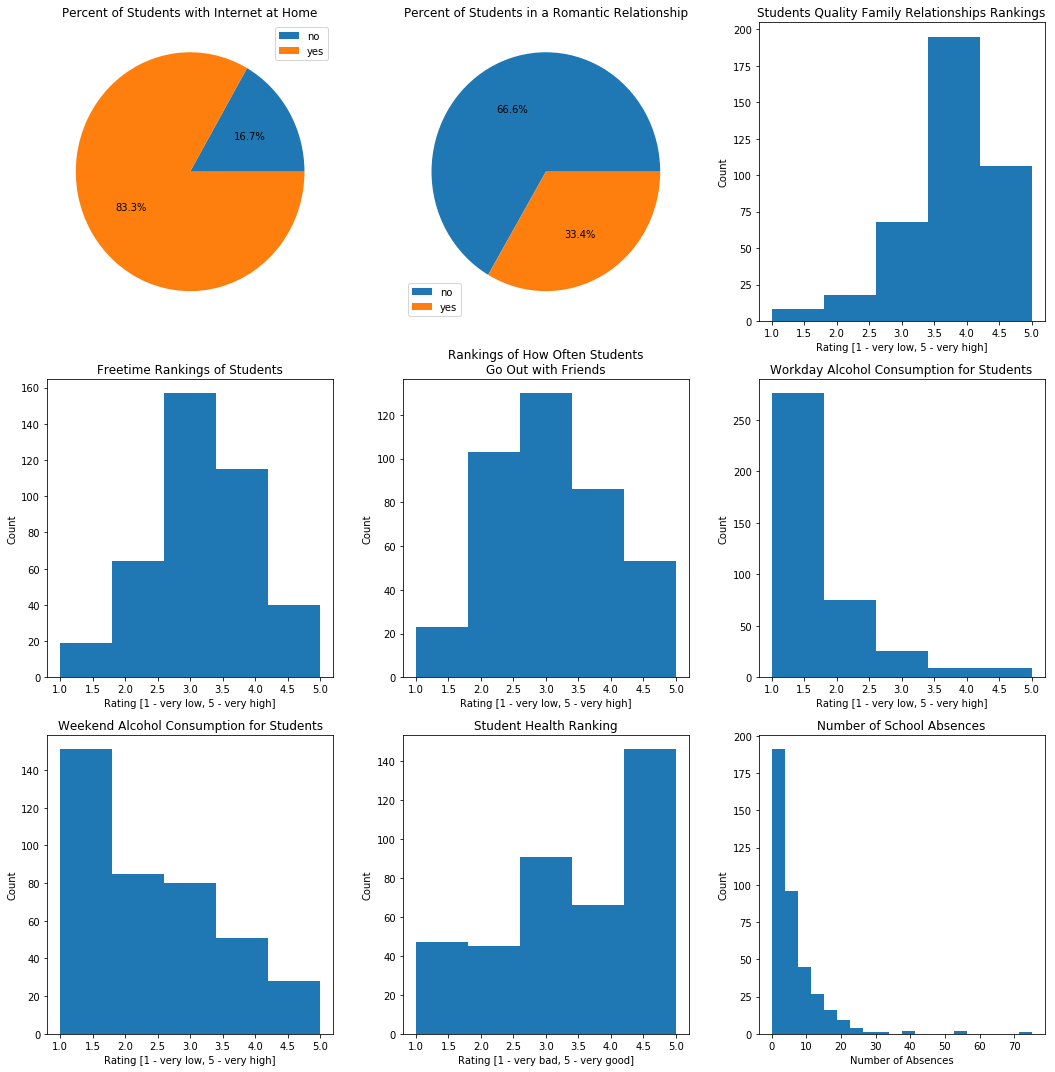

In [7]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
#processing data to create value counts, sorted by index for consistency
internet = math_df.internet.value_counts().sort_index()
plt.pie(internet, autopct='%1.1f%%')
plt.legend(internet.index, loc='best')
plt.title('Percent of Students with Internet at Home')

plt.subplot(3, 3, 2)
#processing data to create value counts, sorted by index for consistency
romantic = math_df.romantic.value_counts().sort_index()
plt.pie(romantic, autopct='%1.1f%%')
plt.legend(romantic.index, loc='best')
plt.title('Percent of Students in a Romantic Relationship')

plt.subplot(3, 3, 3)
plt.hist(math_df['famrel'], bins=5)
plt.xlabel('Rating [1 - very low, 5 - very high]')
plt.ylabel('Count')
plt.title('Students Quality Family Relationships Rankings')

plt.subplot(3, 3, 4)
plt.hist(math_df['freetime'], bins=5)
plt.title('Freetime Rankings of Students')
plt.xlabel('Rating [1 - very low, 5 - very high]')
plt.ylabel('Count')

plt.subplot(3, 3, 5)
plt.hist(math_df['goout'], bins=5)
plt.title('Rankings of How Often Students\nGo Out with Friends')
plt.xlabel('Rating [1 - very low, 5 - very high]')
plt.ylabel('Count')

plt.subplot(3, 3, 6)
plt.hist(math_df['Dalc'], bins=5)
plt.title('Workday Alcohol Consumption for Students')
plt.xlabel('Rating [1 - very low, 5 - very high]')
plt.ylabel('Count')

plt.subplot(3, 3, 7)
plt.hist(math_df['Walc'], bins=5)
plt.title('Weekend Alcohol Consumption for Students')
plt.xlabel('Rating [1 - very low, 5 - very high]')
plt.ylabel('Count')

plt.subplot(3, 3, 8)
plt.hist(math_df['health'], bins=5)
plt.title('Student Health Ranking')
plt.xlabel('Rating [1 - very bad, 5 - very good]')
plt.ylabel('Count')

plt.subplot(3, 3, 9)
plt.hist(math_df['absences'], bins=20)
plt.title('Number of School Absences')
plt.xlabel('Number of Absences')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Student Grade Data:    
Finally, a student's grade is given for the first period, the second period, and the student's final grade for the course.



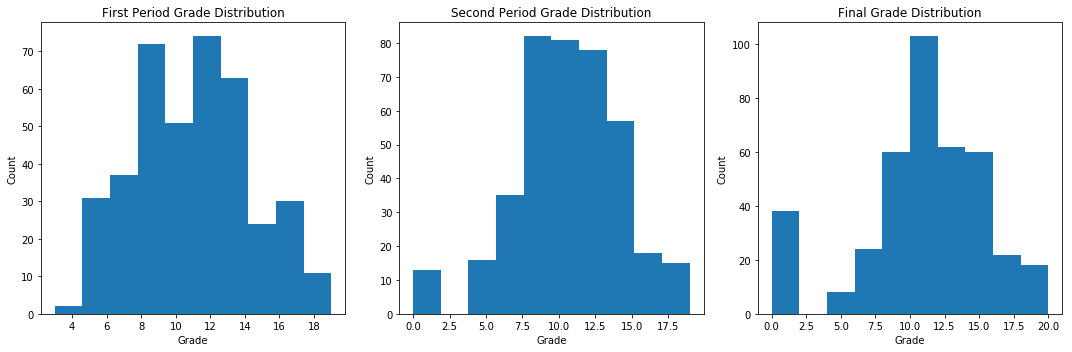

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(math_df['G1'], bins=10)
plt.title('First Period Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(math_df['G2'], bins=10)
plt.title('Second Period Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(math_df['G3'], bins=10)
plt.title('Final Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Grade distributions for the first grading period is approximately normal with a lower number of students scoring around 10.  The second grading period is also approximately normal with the exception of around 10 students earning a score of zero (0.00).  The final grade has a normal distribution with a higher center, and the number of students earning a score of zero went up to around 40.   

## Ask and Answer Analytic Questions

### Question 1
Does the marital status of the parents affect the student?  In particular, does it affect the student's alcohol consumption or grade? 

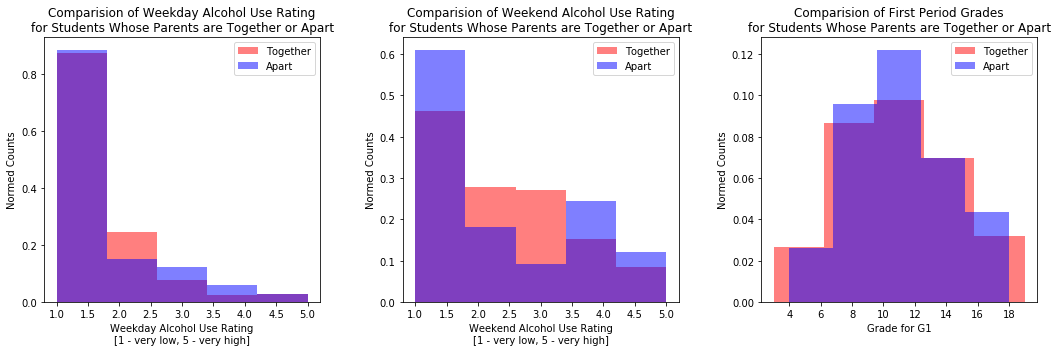

Weekday Alcohol Consumption T-test: Ttest_indResult(statistic=-0.5348268906756007, pvalue=0.5952917046318302)
Weekend Alcohol Consumption T-test: Ttest_indResult(statistic=0.10565833630568172, pvalue=0.9163032077231676)
First Period Grades T-test: Ttest_indResult(statistic=-0.32886508096089484, pvalue=0.7436504885156754)


In [9]:
#separating out the data points
math_apart = math_df[lambda df: math_df["Pstatus"] == "A"]
math_together = math_df[lambda df: math_df["Pstatus"] == "T"]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(math_together["Dalc"], bins=5, alpha=0.5, normed=True, color='red', label='Together')
plt.hist(math_apart['Dalc'], bins=5, alpha=0.5, normed=True, color='blue', label='Apart')
plt.xlabel("Weekday Alcohol Use Rating\n[1 - very low, 5 - very high]")
plt.ylabel("Normed Counts")
plt.title("Comparision of Weekday Alcohol Use Rating\nfor Students Whose Parents are Together or Apart")
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(math_together["Walc"], bins=5, alpha=0.5, normed=True, color='red', label='Together')
plt.hist(math_apart['Walc'], bins=5, alpha=0.5, normed=True, color='blue', label='Apart')
plt.xlabel("Weekend Alcohol Use Rating\n[1 - very low, 5 - very high]")
plt.ylabel("Normed Counts")
plt.title("Comparision of Weekend Alcohol Use Rating\nfor Students Whose Parents are Together or Apart")
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(math_together["G1"], bins=5, alpha=0.5, normed=True, color='red', label='Together')
plt.hist(math_apart['G1'], bins=5, alpha=0.5, normed=True, color='blue', label='Apart')
plt.xlabel("Grade for G1")
plt.ylabel("Normed Counts")
plt.title("Comparision of First Period Grades\nfor Students Whose Parents are Together or Apart")
plt.legend()

plt.tight_layout()
plt.show()

print('Weekday Alcohol Consumption T-test:', ttest_ind(math_together['Dalc'], math_apart['Dalc'], equal_var=False))
print('Weekend Alcohol Consumption T-test:', ttest_ind(math_together['Walc'], math_apart['Walc'], equal_var=False))
print('First Period Grades T-test:', ttest_ind(math_together['G1'], math_apart['G1'], equal_var=False))


__Answer to Question 1:__
The data shows that while slightly more students whose parents are apart rate themselves higher on alcohol consumption, both on weekdays and weekends, these results are not statistically significant from one another, with p-values of 0.5953 and 0.9163, respectfully.  This means that parent's marital status does not greatly impact a student's alcohol consumption. Additionally, the distribution of grades for students whose parents are together and apart are nearly identical and normally distributed.  Again, marital status does not have a statistically significant impact on grades, with a p-value of 0.7436.  

### Question 2:
Does living in an urban or rural setting affect a student's alcohol use or grade?

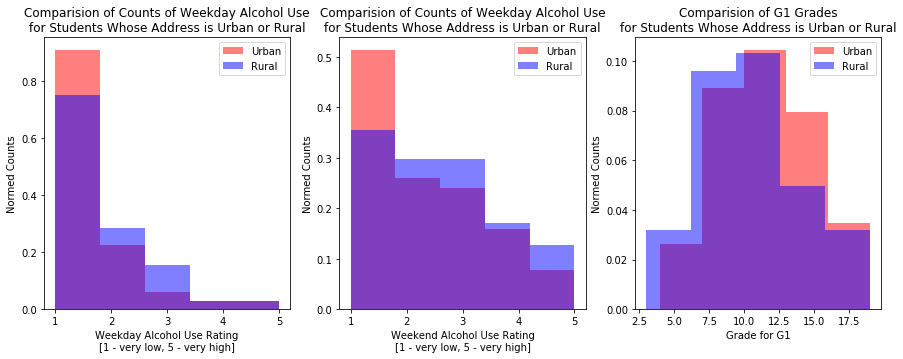

Weekday Alcohol Consumption T-test: Ttest_indResult(statistic=-1.7736624822132774, pvalue=0.07842897230271297)
Weekend Alcohol Consumption T-test: Ttest_indResult(statistic=-1.9822106974554923, pvalue=0.04944908568102313)
First Period Grade T-test: Ttest_indResult(statistic=1.3553287908936396, pvalue=0.17755134893925215)


In [10]:
#separating out the data points
math_urban = math_df[lambda df: math_df["address"] == "U"]
math_rural = math_df[lambda df: math_df["address"] == "R"]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(math_urban['Dalc'], bins=5, alpha=0.5, normed=True, color='red', label='Urban')
plt.hist(math_rural['Dalc'], bins=5, alpha=0.5, normed=True, color='blue', label='Rural')
plt.xlabel("Weekday Alcohol Use Rating\n[1 - very low, 5 - very high]")
plt.ylabel("Normed Counts")
plt.title("Comparision of Counts of Weekday Alcohol Use\nfor Students Whose Address is Urban or Rural")
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(math_urban['Walc'], bins=5, alpha=0.5, normed=True, color='red', label='Urban')
plt.hist(math_rural['Walc'], bins=5, alpha=0.5, normed=True, color='blue', label='Rural')
plt.xlabel("Weekend Alcohol Use Rating\n[1 - very low, 5 - very high]")
plt.ylabel("Normed Counts")
plt.title("Comparision of Counts of Weekday Alcohol Use\nfor Students Whose Address is Urban or Rural")
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(math_urban['G1'], bins=5, alpha=0.5, normed=True, color='red', label='Urban')
plt.hist(math_rural['G1'], bins=5, alpha=0.5, normed=True, color='blue', label='Rural')
plt.xlabel("Grade for G1")
plt.ylabel("Normed Counts")
plt.title("Comparision of G1 Grades\nfor Students Whose Address is Urban or Rural")
plt.legend()

plt.show()

print('Weekday Alcohol Consumption T-test:', ttest_ind(math_urban['Dalc'], math_rural['Dalc'], equal_var=False))
print('Weekend Alcohol Consumption T-test:', ttest_ind(math_urban['Walc'], math_rural['Walc'], equal_var=False))
print('First Period Grade T-test:', ttest_ind(math_urban['G1'], math_rural['G1'], equal_var=False))

__Answer Question 2:__
According to the data, students who live in rural areas are more likely to rate themselves as drinking more alcohol, both on weekdays and weekends.  With a p-value of 0.07843, this difference is not statistically significant for weekday consumption, however for weekend consumption, there is a statistically signiciant difference in alcohol consumption, with a p-value of 0.04944.  This means that students who live in rural areas have a higher consumption of alcohol on the weekends than peers living in urban settings. 

This finding prompted a side question, wondering if students living in rural areas have more or less freetime than students living in urban areas. 

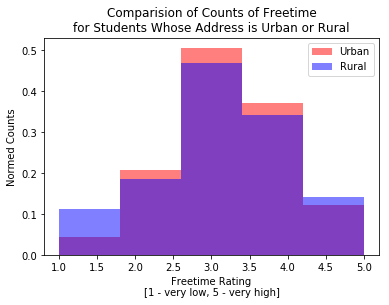

Freetime in Urban and Rural Areas T-test: Ttest_indResult(statistic=0.6422665799609012, pvalue=0.5218527191320144)


In [11]:
plt.hist(math_urban['freetime'], bins=5, alpha=0.5, normed=True, color='red', label='Urban')
plt.hist(math_rural['freetime'], bins=5, alpha=0.5, normed=True, color='blue', label='Rural')
plt.xlabel("Freetime Rating\n[1 - very low, 5 - very high]")
plt.ylabel("Normed Counts")
plt.title("Comparision of Counts of Freetime\nfor Students Whose Address is Urban or Rural")
plt.legend()
plt.show()

print('Freetime in Urban and Rural Areas T-test:', ttest_ind(math_urban['freetime'], math_rural['freetime'], equal_var=False))

Although students living in rural areas have higher number of people rating themselves as having both "very high" and "very low" amounts of freetime, there is no statistical significance between the two (p-value: 0.5219), so the amount of freetime in the whole sample does not impact the alcohol consumption habits of students.  To further answer this question, the data was split up into urban and rural addresses with the same analysis. 

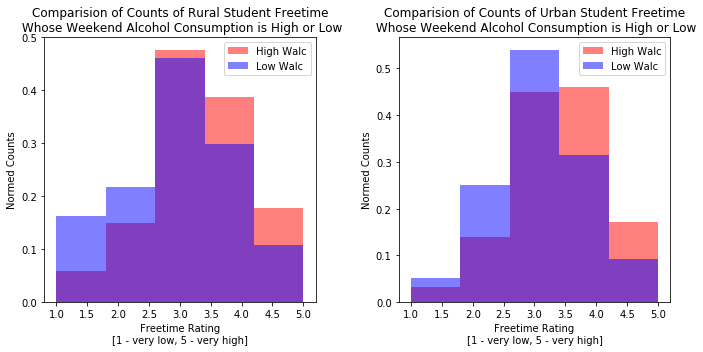

Freetime for High and Low Alcohol for Rural Students T-test: Ttest_indResult(statistic=1.7330962612042426, pvalue=0.08666310940861861)
Freetime for High and Low Alcohol for Urban Students T-test: Ttest_indResult(statistic=3.2420599784816626, pvalue=0.001351015367567224)


In [12]:
#Splitting up data from rural students into high and low alcohol consumption
rural_high_walc = math_rural[lambda df: math_rural["Walc"] >= 3]
rural_low_walc = math_rural[lambda df: math_rural["Walc"] < 3]

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.hist(rural_high_walc['freetime'], bins=5, alpha=0.5, normed=True, color='red', label='High Walc')
plt.hist(rural_low_walc['freetime'], bins=5, alpha=0.5, normed=True, color='blue', label='Low Walc')
plt.xlabel("Freetime Rating\n[1 - very low, 5 - very high]")
plt.ylabel("Normed Counts")
plt.title("Comparision of Counts of Rural Student Freetime\n Whose Weekend Alcohol Consumption is High or Low")
plt.legend()

#Splitting up data from urban students into high and low alcohol consumption
urban_high_walc = math_urban[lambda df: math_urban["Walc"] >= 3]
urban_low_walc = math_urban[lambda df: math_urban["Walc"] < 3]

plt.subplot(1, 2, 2)
plt.hist(urban_high_walc['freetime'], bins=5, alpha=0.5, normed=True, color='red', label='High Walc')
plt.hist(urban_low_walc['freetime'], bins=5, alpha=0.5, normed=True, color='blue', label='Low Walc')
plt.xlabel("Freetime Rating\n[1 - very low, 5 - very high]")
plt.ylabel("Normed Counts")
plt.title("Comparision of Counts of Urban Student Freetime\n Whose Weekend Alcohol Consumption is High or Low")
plt.legend()

plt.tight_layout()
plt.show()

print('Freetime for High and Low Alcohol for Rural Students T-test:', ttest_ind(rural_high_walc['freetime'], rural_low_walc['freetime'], equal_var=False))
print('Freetime for High and Low Alcohol for Urban Students T-test:', ttest_ind(urban_high_walc['freetime'], urban_low_walc['freetime'], equal_var=False))

According to the data, the students who rate themselves as having less freetime also rate themselves as consuming less alcohol, no matter if they are from rural or urban areas. Conversely, students who drink more alcohol on the weekends, rate that they have more freetime after school.  This is not quite statistically significant for students from rural addresses (p-value = 0.08666), however this difference becomes significant for students living in urban areas (p-value = 0.01351).  This means that for students who live in urban areas, the amount of free time is a good indicator of alcohol consumption. 

### Question 2.5:
Does having more positive factors correlate to having a higher grade?

Positive factors include higher parent education, more time studying, more quality family relationships, and being healthier overall. Each of the positive factors was weighted based on how much that could potentially impact the student. All factors are believed to be equally as impactful on a student's success, and were therefore all weighted 20%.

Negative factors include past failures, more freetime, going out with friends more, and increased alcohol consumption.  Each of the positive factors was weighted based on how much that could potentially impact the student. Failures and alcohol consumption have the most potential impact on a student, so were weighted 50% and 20%, respectfully.  Freetime and time spent going out with friends were both weighted as 5% of negative factors because they could potentially represent balance in a student's life.

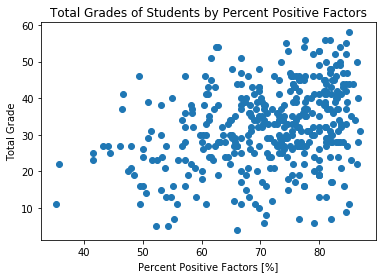

In [13]:
#compiling the data for positive and negative factors to find percent positive factors and total grade
for student in math_df:
    math_df["neg_factors"] = 0.5*math_df['failures'] + 0.05*math_df['freetime'] + 0.05*math_df['goout'] + 0.2*math_df['Dalc'] + 0.2*math_df['Walc']
    math_df['pos_factors'] = 0.2*math_df['Medu'] + 0.2*math_df['Fedu'] + 0.2*math_df['studytime'] + 0.2*math_df['famrel'] + 0.2*math_df['health']
    math_df['percent_pos_factors'] = 100 * math_df['pos_factors'] / (math_df['pos_factors'] + math_df['neg_factors'])
    math_df['total_grade'] = math_df['G1'] + math_df['G2'] + math_df['G3']
    
plt.scatter(x=math_df['percent_pos_factors'], y=math_df['total_grade'])
plt.xlabel('Percent Positive Factors [%]')
plt.ylabel('Total Grade')
plt.title('Total Grades of Students by Percent Positive Factors')
plt.show()

In [14]:
more_neg_factors = math_df[lambda df: math_df['percent_pos_factors'] <= 50]
more_pos_factors = math_df[lambda df: math_df['percent_pos_factors'] > 50]

print('Total Grade with more Negative Factors:', more_neg_factors.total_grade.mean())
print('Total Grade with more Positive Factors:', more_pos_factors.total_grade.mean())

print('Grades for Students with more Positive and Negative Factors T-test:', 
      ttest_ind(more_neg_factors['total_grade'], more_pos_factors['total_grade'], equal_var=False))

print('Pearson Correlation Coefficient (R= , p-value): ', 
      pearsonr(math_df['percent_pos_factors'], math_df['total_grade']))

Total Grade with more Negative Factors: 24.55
Total Grade with more Positive Factors: 32.437333333333335
Grades for Students with more Positive and Negative Factors T-test: Ttest_indResult(statistic=-3.816490374905906, pvalue=0.0009268756610808675)
Pearson Correlation Coefficient (R= , p-value):  (0.3105497491563695, 2.8055850959724224e-10)


__Answer Question 2.5:__
Students who rated themselves as having more positive factors than negative factors are more likely to have a higher final grade by an average of 7.88 points.  This is statistically significant with a p-value of 0.000927.  This means that although there are small indications of what individual trait might cause a student to score higher in a class, it is the overall positive factors in a student's life that promotes the culture of success for the student.  

The Pearson Correlation Coefficient, which measures the linear relationship between the two data sets, is 0.311, meaning that the percent positive factors has a positive correlation with total grade.  The p-value of this is extremely small at 2.806 x 10^-10.

### Question 3:
Does the highest education level of a student's parents impact their achievement?

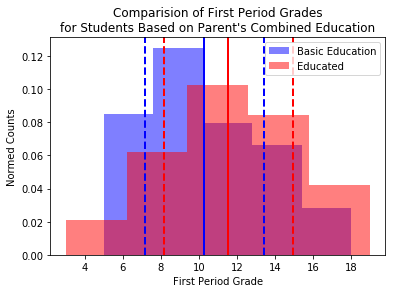

Ttest_indResult(statistic=-3.8337761730589057, pvalue=0.00014726122744215255)


In [15]:
#Manipulating data to create total education of parents and separating out data based on the parents education level
for student in math_df:
    math_df["Tedu"] = math_df['Medu'] + math_df['Fedu']
educated = math_df[lambda df: math_df['Tedu'] >= 6]
basic_edu = math_df[lambda df: math_df['Tedu'] < 6]

plt.hist(basic_edu['G1'], normed=True, bins=5, alpha=0.5, color='blue', label='Basic Education')
plt.hist(educated['G1'], normed=True, bins=5, alpha=0.5, color='red', label='Educated')
plt.xlabel("First Period Grade")
plt.ylabel("Normed Counts")
plt.title("Comparision of First Period Grades\nfor Students Based on Parent's Combined Education")
#creating vertical lines for mean and standard deviation of educated and basically educated parents
plt.axvline(np.mean(basic_edu['G1']), color='blue', linestyle='solid', linewidth=2)
plt.axvline(np.mean(basic_edu['G1']) + np.std(basic_edu['G1']), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(basic_edu['G1']) - np.std(basic_edu['G1']), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(educated['G1']), color='red', linestyle='solid', linewidth=2)
plt.axvline(np.mean(educated['G1']) + np.std(educated['G1']), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(educated['G1']) - np.std(educated['G1']), color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

print(ttest_ind(basic_edu['G1'], educated['G1'], equal_var=False))

__Answer Question 3:__
According to the data, students whose parents have a combined education equivalent of both having a secondary education, is a statistically significant predictor of greater student success (p-value = 0.0001473).  This is small proof of the achievement gap because for students whose parents did not achieve a lot, educationally speaking, the student's grades will be lower.   

## Opportunities for Further Research

1.  Collect actual values for data points, not just a rating based on opinion.  For example, for alcohol consumption, a student could report the actual number of drinks during that period.  This would provide a more objective viewpoint, rather than the subjective rating that was given.  This could be done for the other subjective ratings of free time, and going out with friends too.

2. Collect this data over time to determine how factors change over time for each individual student and how this could impact their grade.  Without historical data, it is unclear if the correlations found in this data were because of past successes and failures, or from the student's current circumstance. Did having positive family relationships early in life help shape the student academically? Does childhood health correlate with higher scores later in life?

3. How does this data for these schools relate to the neighboring schools? Is this school representative of the population of this city or country? Or is this school doing particularly well? Do these students have similar outcomes as those in other schools? Are parents right to choose this school based on its reputation?